<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/11%20-%20Classification%202/Walkthrough/walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> WALKTHROUGH</h1>

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# Classification 2: K-Nearest Neighbours and Decision Trees

For classification we can use different algorithms, for example:
- Logisitic regression (seen last week)
- K-Nearest Neighbours
- Decision Tree
- Random Forest
- Gradient Descent
- etc...

This week we will cover **K-Nearest Neighbours** and **Decision Trees**.




For the walkthrough we will use a dataset on *fruits caracteristics* and show two new classification algorithms : __K-Nearest Neighbours__ and __Decision Trees__. Independent of which algorithm we use, we need to:
- Load our dataset
- Define our dependent and independent variables
- Split our dataset into train and test subsets
- Normalize our dataset
- Create the model (regression, KNN, decision tree, ...)
- Train our model
- Check the accuracy

In [80]:
#Load dataset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

url = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/fruitsII_2025.csv'
fruits = pd.read_csv(url,sep=";")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,cripps_pink,161,7.4,7.0,0.82
1,1,apple,golden_delicious,153,7.7,7.4,0.70
2,1,apple,cripps_pink,162,7.4,7.2,0.85
3,1,apple,golden_delicious,165,7.4,7.8,0.71
4,1,apple,braeburn,171,7.3,6.9,0.88


Here, we want to predict the class (`fruit label`) using other features.



In [82]:
#Define features and target variable
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

In [83]:
X.shape

(89, 4)

Let's see the different classes:

In [84]:
print(fruits['fruit_name'].unique())

['apple' 'orange']


In [85]:
print(fruits.fruit_label.unique())

[1 2]


As we can see here we have two classes. This means that whenever we make predictions, a new observation (fruit) will be classified either as an apple (1) or as an orange (2).

### 1. Split into Train and Test Set

The data is split randomly into train and test subsets. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We use the test set in order to test our prediction on this subset. By default, the `train_test_split` function applies a ratio of 75%/25% to split the dataset (if nothing is given).


In [86]:
#Split data set into a train and a test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

Let's have a quick look at our features contained in `X_train`.

In [87]:
X_train.describe()

,mass,width,height,color_score
count,66.000000,66.000000,66.000000,66.000000
mean,183.696970,7.557576,7.740909,0.770455
std,60.603623,0.662875,0.698565,0.076247
min,138.000000,6.600000,6.700000,0.550000
25%,153.250000,7.125000,7.225000,0.740000
50%,161.000000,7.400000,7.600000,0.765000
75%,179.750000,7.675000,7.900000,0.810000
max,364.000000,9.700000,9.500000,0.930000


### 2. Normalization

When we have a dataset with features that have very distinct ranges (for example one feature where the age is between 0 and 99 years and another feature being the income ranging from 1'000 CHF to 200'000 CHF), we might get biaised results. We want the features to be in the same or similar ranges/units. Therefore, we **normalize** the data. It involves scaling all values for a specific feature given attribute so that they fall within a small specified range.
We can use the *StandardScaler()*, the *MinMaxScaler* () or other scalers for the normalization.
<br>

In our example we will normalize our **train AND test set** using the MinMaxScaler. This will give all features values between 0 and 1.

**IMPORTANT**: When you normalize the train set, you need to do the same modificaiton (here normalization) to the test set.

In [88]:
#Define normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [89]:
#Apply normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's quickly check that our features contained in X_train have been normalized: all values are between the (0,1) range.

In [90]:
pd.DataFrame(X_train, columns=['mass', 'width', 'height', 'color_score']).describe()

,mass,width,height,color_score
count,66.000000,66.000000,66.000000,66.000000
mean,0.202199,0.308895,0.371753,0.580144
std,0.268158,0.213831,0.249487,0.200651
min,0.000000,0.000000,0.000000,0.000000
25%,0.067478,0.169355,0.187500,0.500000
50%,0.101770,0.258065,0.321429,0.565789
75%,0.184735,0.346774,0.428571,0.684211
max,1.000000,1.000000,1.000000,1.000000


### 3. K-Nearest Neighbor

The KNN algorithm classifies new examples considering the most represented class among the K nearest neighbors in the hyperspace. This means that if k = 1, the object is simply assigned to the class of the single nearest neighbor. If k = 5, then the classification of the object will be based on a majority vote of the 5 nearest datapoints. It is simple to implement, robust to noisy training set, and effective if the training set is large. Nevertheless, we need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples. <br>

As seen before, we will first need to create our model. We will build the model from the **training set**. We have already split our dataset into **test** and **trainig sets**.

Here we need to specify **how many neighbors** are to be considered in the classification when creating the model.

In [91]:
#Create model with K=11
from sklearn.neighbors import KNeighborsClassifier
model_k11 = KNeighborsClassifier(n_neighbors=11)

In [92]:
#Fit model
model_k11.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [93]:
#Use model on test and check accuracy

print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(model_k11.score(X_test, y_test)))

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(model_k11.score(X_train, y_train)))

Accuracy of KNN classifier on test set: 0.96
Accuracy of KNN classifier on training set: 0.94


We chose k = 11 arbitrarily, maybe we can have a better accuracy with another number. Similarly we could change other parameters. Let's try with a different **weight** which gives less importance to far away points and to **p** to change the way we compute distance between 2 points [See here for information on p-norm](https://en.wikipedia.org/wiki/Minkowski_distance). Let's try for different values.

Below we use a number of different prameters:
- `n_neighbors`=number of neighboring observations to use
- `p`= determines the distance/similarity metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
- `weights`= determines how to weigh the neighboring observations.
  - When set to `uniform` : uniform weights. All points in each neighborhood are weighted equally.
  - When set to `distance` : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

For a full list of available parameters you can check the [documentation file](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [94]:
n_neighbors = [2,3,4,5]
p_values = [1,2,3]
weights = ['uniform', 'distance']
for n in n_neighbors:
    for p in p_values:
        for w in weights:
            model = KNeighborsClassifier(n_neighbors=n, p=p, weights=w)
            model.fit(X_train, y_train)
            print("accuracy for k = " + str(n) + ", p = " + str(p) + ", weight = " + w + " : " + str(model.score(X_test, y_test)))

accuracy for k = 2, p = 1, weight = uniform : 0.9565217391304348
accuracy for k = 2, p = 1, weight = distance : 0.9565217391304348
accuracy for k = 2, p = 2, weight = uniform : 0.9565217391304348
accuracy for k = 2, p = 2, weight = distance : 0.9565217391304348
accuracy for k = 2, p = 3, weight = uniform : 0.9565217391304348
accuracy for k = 2, p = 3, weight = distance : 0.9565217391304348
accuracy for k = 3, p = 1, weight = uniform : 1.0
accuracy for k = 3, p = 1, weight = distance : 1.0
accuracy for k = 3, p = 2, weight = uniform : 1.0
accuracy for k = 3, p = 2, weight = distance : 1.0
accuracy for k = 3, p = 3, weight = uniform : 1.0
accuracy for k = 3, p = 3, weight = distance : 1.0
accuracy for k = 4, p = 1, weight = uniform : 1.0
accuracy for k = 4, p = 1, weight = distance : 1.0
accuracy for k = 4, p = 2, weight = uniform : 1.0
accuracy for k = 4, p = 2, weight = distance : 1.0
accuracy for k = 4, p = 3, weight = uniform : 1.0
accuracy for k = 4, p = 3, weight = distance : 1.0
a

In [95]:
# You don't have to understand this code, it's just here to plot decision boundaries
from sklearn.inspection import DecisionBoundaryDisplay

def plot_knn_decision_boundaries(X, y, weights='uniform', metric='minkowski', n_neighbors_list=[1, 3, 5, 11]):
    # We'll use only two features for visualization
    X_subset = X[:, [1, 2]]  # Using width and height

    feature_names = ['width', 'height']

    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])

    for i, n_neighbors in enumerate(n_neighbors_list):
        # Create and fit the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
        knn.fit(X_subset, y)

        # Plot decision boundary
        disp = DecisionBoundaryDisplay.from_estimator(
            knn,
            X_subset,
            cmap=cmap_light,
            alpha=0.5,
            ax=axes[i],
            response_method="predict",
        )
        scatter = axes[i].scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
        legend = axes[i].legend(*scatter.legend_elements(), title="Classes")
        axes[i].add_artist(legend)

        axes[i].set_title(f'KNN (k={n_neighbors})')
        axes[i].set_xlabel(feature_names[0])
        axes[i].set_ylabel(feature_names[1])

    plt.tight_layout()
    plt.suptitle('KNN Decision Boundaries with Different k Values', y=1.05, fontsize=16)
    plt.show()

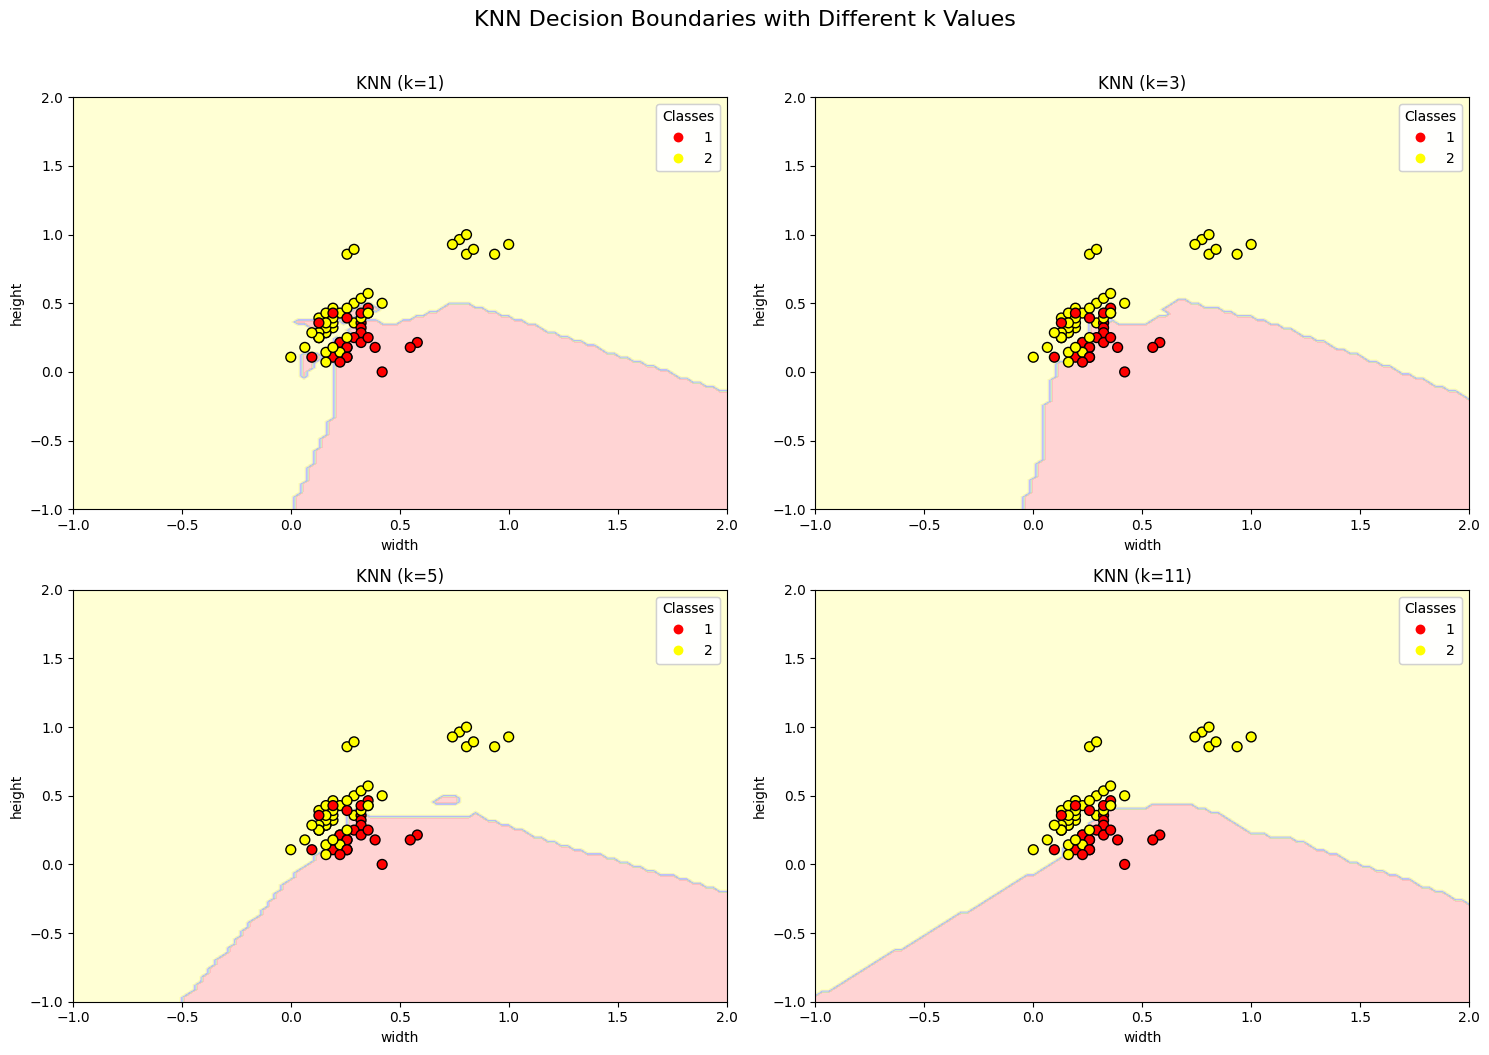

In [96]:
plot_knn_decision_boundaries(X_train, y_train)

#### 4. Tuning hyperparameters with cross-validation

We now want to find which hyperparameters of the [KNN class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) are the optimal ones. For this we use [Grid Search Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [97]:
# Grid Search - hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameters to test
grid = {'n_neighbors':np.arange(1,10),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

# Define and fit model
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=5)
knn_cv.fit(X_train, y_train)

# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", round(knn_cv.best_score_, 4))
print("Test Score:", round(knn_cv.score(X_test, y_test), 4))

Hyperparameters: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Train Score: 0.9549
Test Score: 0.9565


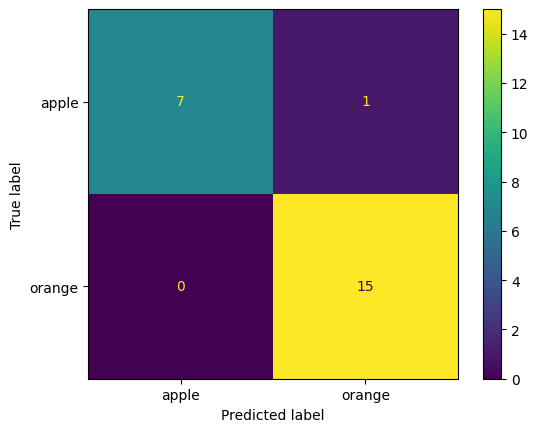


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.94      1.00      0.97        15

    accuracy                           0.96        23
   macro avg       0.97      0.94      0.95        23
weighted avg       0.96      0.96      0.96        23


Micro and Macro Metrics:
 - Micro Precision: 0.957
 - Macro Precision: 0.969
 - Micro Recall: 0.957
 - Macro Recall: 0.938


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import numpy as np


y_pred = knn_cv.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn_cv.classes_)

disp.plot()

classes = ['apple', 'orange']
tick_marks = np.arange(len(classes))
disp.ax_.set_xticks(tick_marks)
disp.ax_.set_yticks(tick_marks)
disp.ax_.set_xticklabels(classes)
disp.ax_.set_yticklabels(classes)
plt.show()
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate micro and macro metrics
print("\nMicro and Macro Metrics:")
print(f" - Micro Precision: {precision_score(y_test, y_pred, average='micro'):.3f}")
print(f" - Macro Precision: {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f" - Micro Recall: {recall_score(y_test, y_pred, average='micro'):.3f}")
print(f" - Macro Recall: {recall_score(y_test, y_pred, average='macro'):.3f}")

The model shows an **imbalance pattern**: perfect precision (1.00) but lower recall (0.88) for the minority apple class, versus perfect recall (1.00) but slightly lower precision (0.94) for the majority orange class. 

This suggests the model is more cautious when predicting the minority class, creating a precision-recall tradeoff 

### 5. Decision Tree
A decision tree classifier relies on a decision tree to predict the class of a new datapoint. In fact, it produces a sequence of rules that can be used to classify the data. It is a great algorithm as it is easy to understand and visualize. Furthermore, it can handle numerical and categorical data.

 **Warning:** It is possible that decision trees build models that are too complex or that cannot generalize well (overfitting). It can also be unstable, as small variations in the data set might cause the generation of a completely different tree. <br>

Before building it we need to specify the maximum depth of our tree, which represents the amount of nodes we allow the tree to generate.

In [101]:
#create, fit and test model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9565217391304348


We achieve perfection on the test set, but our model may be overly complicated. Let's see if we can reduce max depth without losing accuracy.
Let's randomly try some numbers.

In [102]:
model = DecisionTreeClassifier(max_depth = 1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8260869565217391


In [103]:
#function to find the tree with the lowest depth (less complicated model) keeping an accuracy of 1
depth = 5
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
while accuracy == 1:
    depth -= 1
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
print(depth+1)

6


/tmp/ipykernel_101268/2761509241.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,


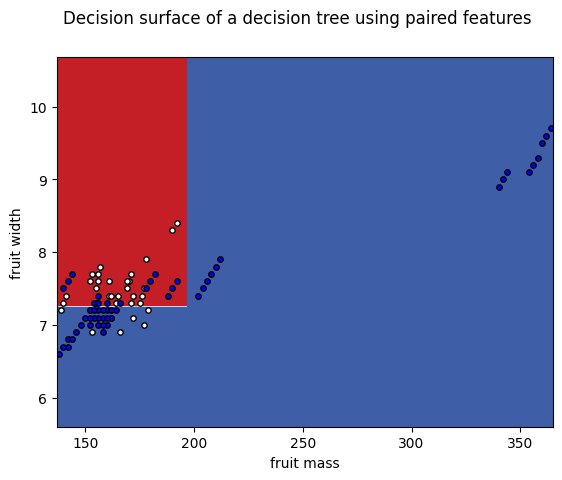

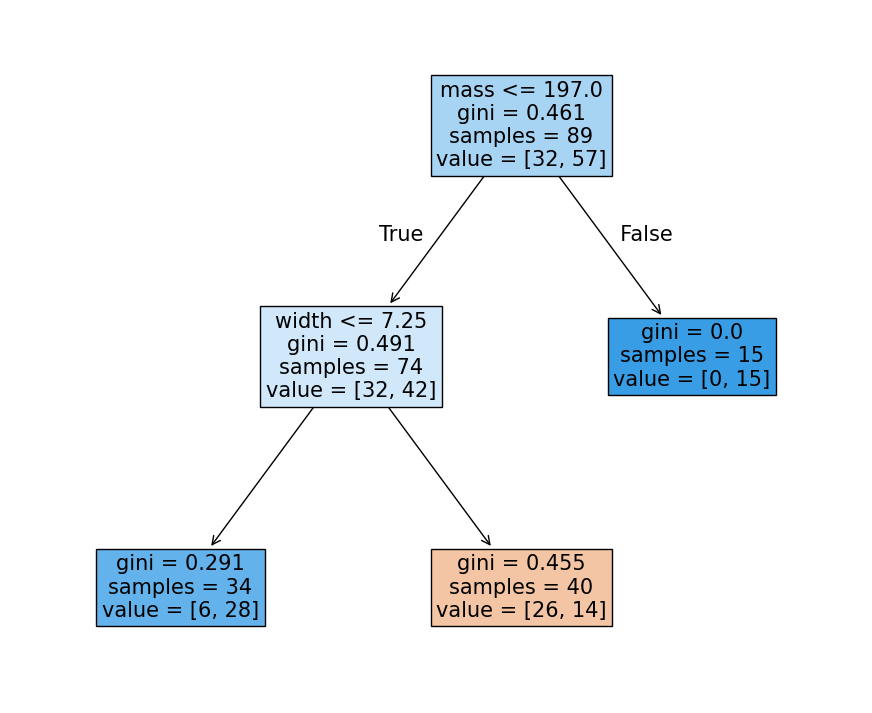

In [104]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

plot_colors = "wb"
plot_step = 0.02


X = X[['mass', 'width']].values

clf = DecisionTreeClassifier(max_depth = 2).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel('fruit mass')
plt.ylabel('fruit width')

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i+1)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.axis("tight")

plt.figure(figsize=(11,9))
clf = DecisionTreeClassifier(max_depth = 2).fit(X, y)
plot_tree(clf, filled=True, feature_names=('mass', 'width'), fontsize=15)
plt.show()

A few words about our decision tree:  
It starts with the root in which we have 38 samples (our data points) of which 19 belong to class 1 and 19 belong to class 2.
Each node represents a condition on which the tree splits into branches. The end of a branch that no longer splits is a leaf.
The gini coefficient is our measure of purity for each node. In our dataset we start with 0.5 (corresponds to the 50-50 distribution of classes in the root) and then gradually go down to 0 (maximum purity).